In [1]:
%autosave 1

Autosaving every 1 seconds


In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_curve
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

In [3]:
link="http://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer/breast-cancer.data"
columns=["class_","age","menopause","tumor-size","inv-nodes","node-caps","deg-malig","breast","breast-quad","irradiat"]
data_frame = pd.read_csv(link, names=columns)
data_frame.drop(data_frame.loc[data_frame['node-caps']=='?'].index,inplace=True)
data_frame.drop(data_frame.loc[data_frame['breast-quad']=='?'].index,inplace=True)
x=data_frame.drop(['class_'], axis=1)
y=data_frame['class_']

In [4]:
y.replace(to_replace=y.unique(), 
                            value= list(range(len(y.unique()))), inplace=True)
x['age'].replace(to_replace=x['age'].unique(), 
                             value= list(range(len(x['age'].unique()))), inplace=True)
x['menopause'].replace(to_replace=x['menopause'].unique(), 
                             value= list(range(len(x['menopause'].unique()))), inplace=True)
x['tumor-size'].replace(to_replace=x['tumor-size'].unique(), 
                             value= list(range(len(x['tumor-size'].unique()))), inplace=True)
x['inv-nodes'].replace(to_replace=x['inv-nodes'].unique(), 
                             value= list(range(len(x['inv-nodes'].unique()))), inplace=True)
x['node-caps'].replace(to_replace=x['node-caps'].unique(), 
                             value= list(range(len(x['node-caps'].unique()))), inplace=True)
x['breast'].replace(to_replace=x['breast'].unique(), 
                             value= list(range(len(x['breast'].unique()))), inplace=True)
x['breast-quad'].replace(to_replace=x['breast-quad'].unique(), 
                             value= list(range(len(x['breast-quad'].unique()))), inplace=True)
x['irradiat'].replace(to_replace=x['irradiat'].unique(), 
                             value= list(range(len(x['irradiat'].unique()))), inplace=True)

              precision    recall  f1-score   support

           0       0.86      0.84      0.85        44
           1       0.46      0.50      0.48        12

    accuracy                           0.77        56
   macro avg       0.66      0.67      0.67        56
weighted avg       0.77      0.77      0.77        56



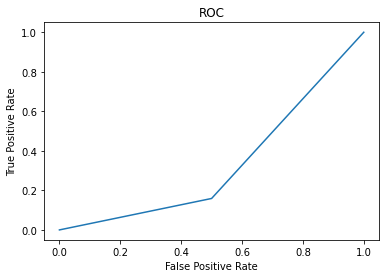

In [5]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=144)
gnb=GaussianNB()
gnb.fit(x_train, y_train)
y_predict=gnb.predict(x_test)
#plot_decision_regions(np.array(x_test),np.array(y_test), clf=gnb,legend=2)
z=accuracy_score(y_test,y_predict)
print(classification_report(y_test,y_predict))
fpr,tpr,threshold=roc_curve(y_test,y_predict,pos_label=1)
#print(tpr,fpr)
plt.plot(tpr,fpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC")
plt.show()